In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import  LogisticRegression
from sklearn import svm
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.linear_model import SGDClassifier

In [5]:
train=pd.read_csv(r'C:\Users\jaysh\Downloads\input\train.csv')

In [6]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 7 columns):
No                          18 non-null int64
material                    18 non-null object
feedrate                    18 non-null int64
clamp_pressure              18 non-null float64
tool_condition              18 non-null object
machining_finalized         18 non-null object
passed_visual_inspection    14 non-null object
dtypes: float64(1), int64(2), object(4)
memory usage: 1.1+ KB
None


In [7]:
print(train.head())

   No material  feedrate  clamp_pressure tool_condition machining_finalized  \
0   1      wax         6             4.0         unworn                 yes   
1   2      wax        20             4.0         unworn                 yes   
2   3      wax         6             3.0         unworn                 yes   
3   4      wax         6             2.5         unworn                  no   
4   5      wax        20             3.0         unworn                  no   

  passed_visual_inspection  
0                      yes  
1                      yes  
2                      yes  
3                      NaN  
4                      NaN  


In [8]:
le1=LabelEncoder()
le1.fit(train['material'])
train['Encoded_material']=le1.transform(train['material'])

le2=LabelEncoder()
le2.fit(train['tool_condition'])
train['Encoded_tool_condition']=le2.transform(train['tool_condition'])

le3=LabelEncoder()
le3.fit(train['machining_finalized'])
train['Encoded_machining_finalized']=le3.transform(train['machining_finalized'])

le4=LabelEncoder()
le4.fit(train['feedrate'])
train['Encoded_feedrate']=le4.transform(train['feedrate'])

le5=LabelEncoder()
le5.fit(train['clamp_pressure'])
train['Encoded_clamp_pressure']=le5.transform(train['clamp_pressure'])

In [9]:
train.drop(['passed_visual_inspection','tool_condition','material','machining_finalized'],axis=1,inplace=True)
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 8 columns):
No                             18 non-null int64
feedrate                       18 non-null int64
clamp_pressure                 18 non-null float64
Encoded_material               18 non-null int32
Encoded_tool_condition         18 non-null int32
Encoded_machining_finalized    18 non-null int32
Encoded_feedrate               18 non-null int64
Encoded_clamp_pressure         18 non-null int64
dtypes: float64(1), int32(3), int64(4)
memory usage: 1.0 KB
None


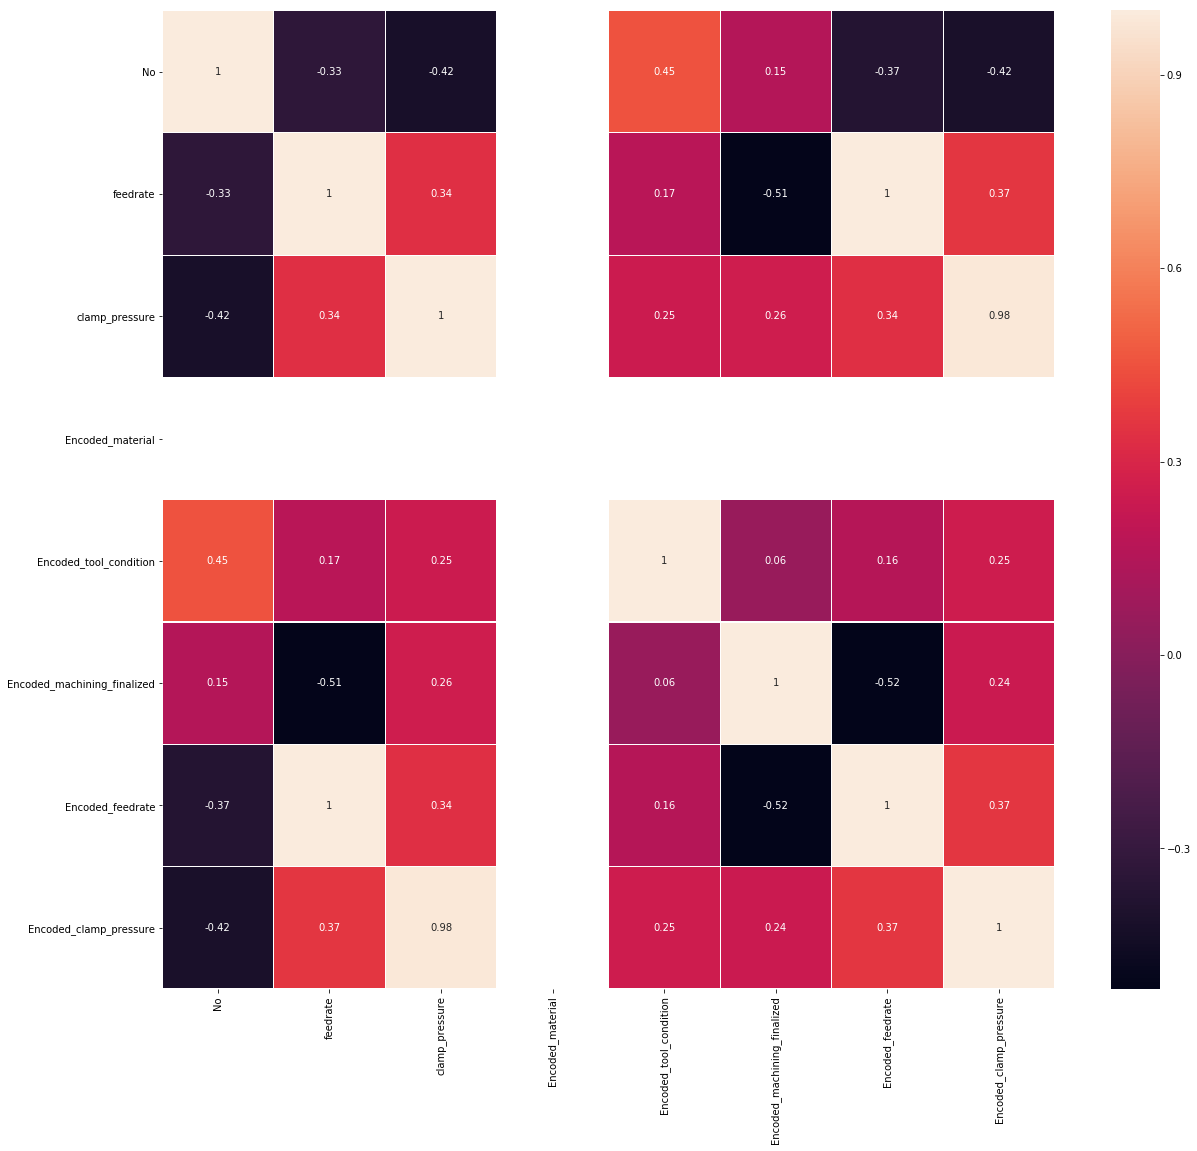

In [10]:
plt.figure(figsize=(20,18))
sns.heatmap(train.corr(),linewidths=.1,annot=True)
plt.show()

In [12]:
frames = []
for i in range(1,19):
    ex_num = '0' + str(i) if i < 10 else str(i)
    frame = pd.read_csv(r"C:\Users\jaysh\Downloads\input\experiment_{}.csv".format(ex_num))

    ex_result_row = train[train['No'] == i]
    
    le6=LabelEncoder()
    le6.fit(frame['Machining_Process'])
    frame['Encoded_Machining_Process']=le6.transform(frame['Machining_Process'])

    frame['Encoded_feedrate'] = ex_result_row.iloc[0]['Encoded_feedrate']
    frame['Encoded_clamp_pressure'] = ex_result_row.iloc[0]['Encoded_clamp_pressure']
    frames.append(frame)

In [13]:
df = pd.concat(frames, ignore_index=True)
print(df.head(3))
print(df.shape)

   X1_ActualPosition  X1_ActualVelocity  X1_ActualAcceleration  \
0              198.0                0.0                   0.00   
1              198.0              -10.8                -350.00   
2              196.0              -17.8                  -6.25   

   X1_CommandPosition  X1_CommandVelocity  X1_CommandAcceleration  \
0               198.0                 0.0                0.000000   
1               198.0               -13.6             -358.000000   
2               196.0               -17.9               -0.000095   

   X1_CurrentFeedback  X1_DCBusVoltage  X1_OutputCurrent  X1_OutputVoltage  \
0                0.18           0.0207             329.0              2.77   
1              -10.90           0.1860             328.0             23.30   
2               -8.59           0.1400             328.0             30.60   

   ...  S1_OutputVoltage  S1_OutputPower  S1_SystemInertia  \
0  ...               0.0    6.960000e-07              12.0   
1  ...               

>>>>> Heatmap of frames <<<<<


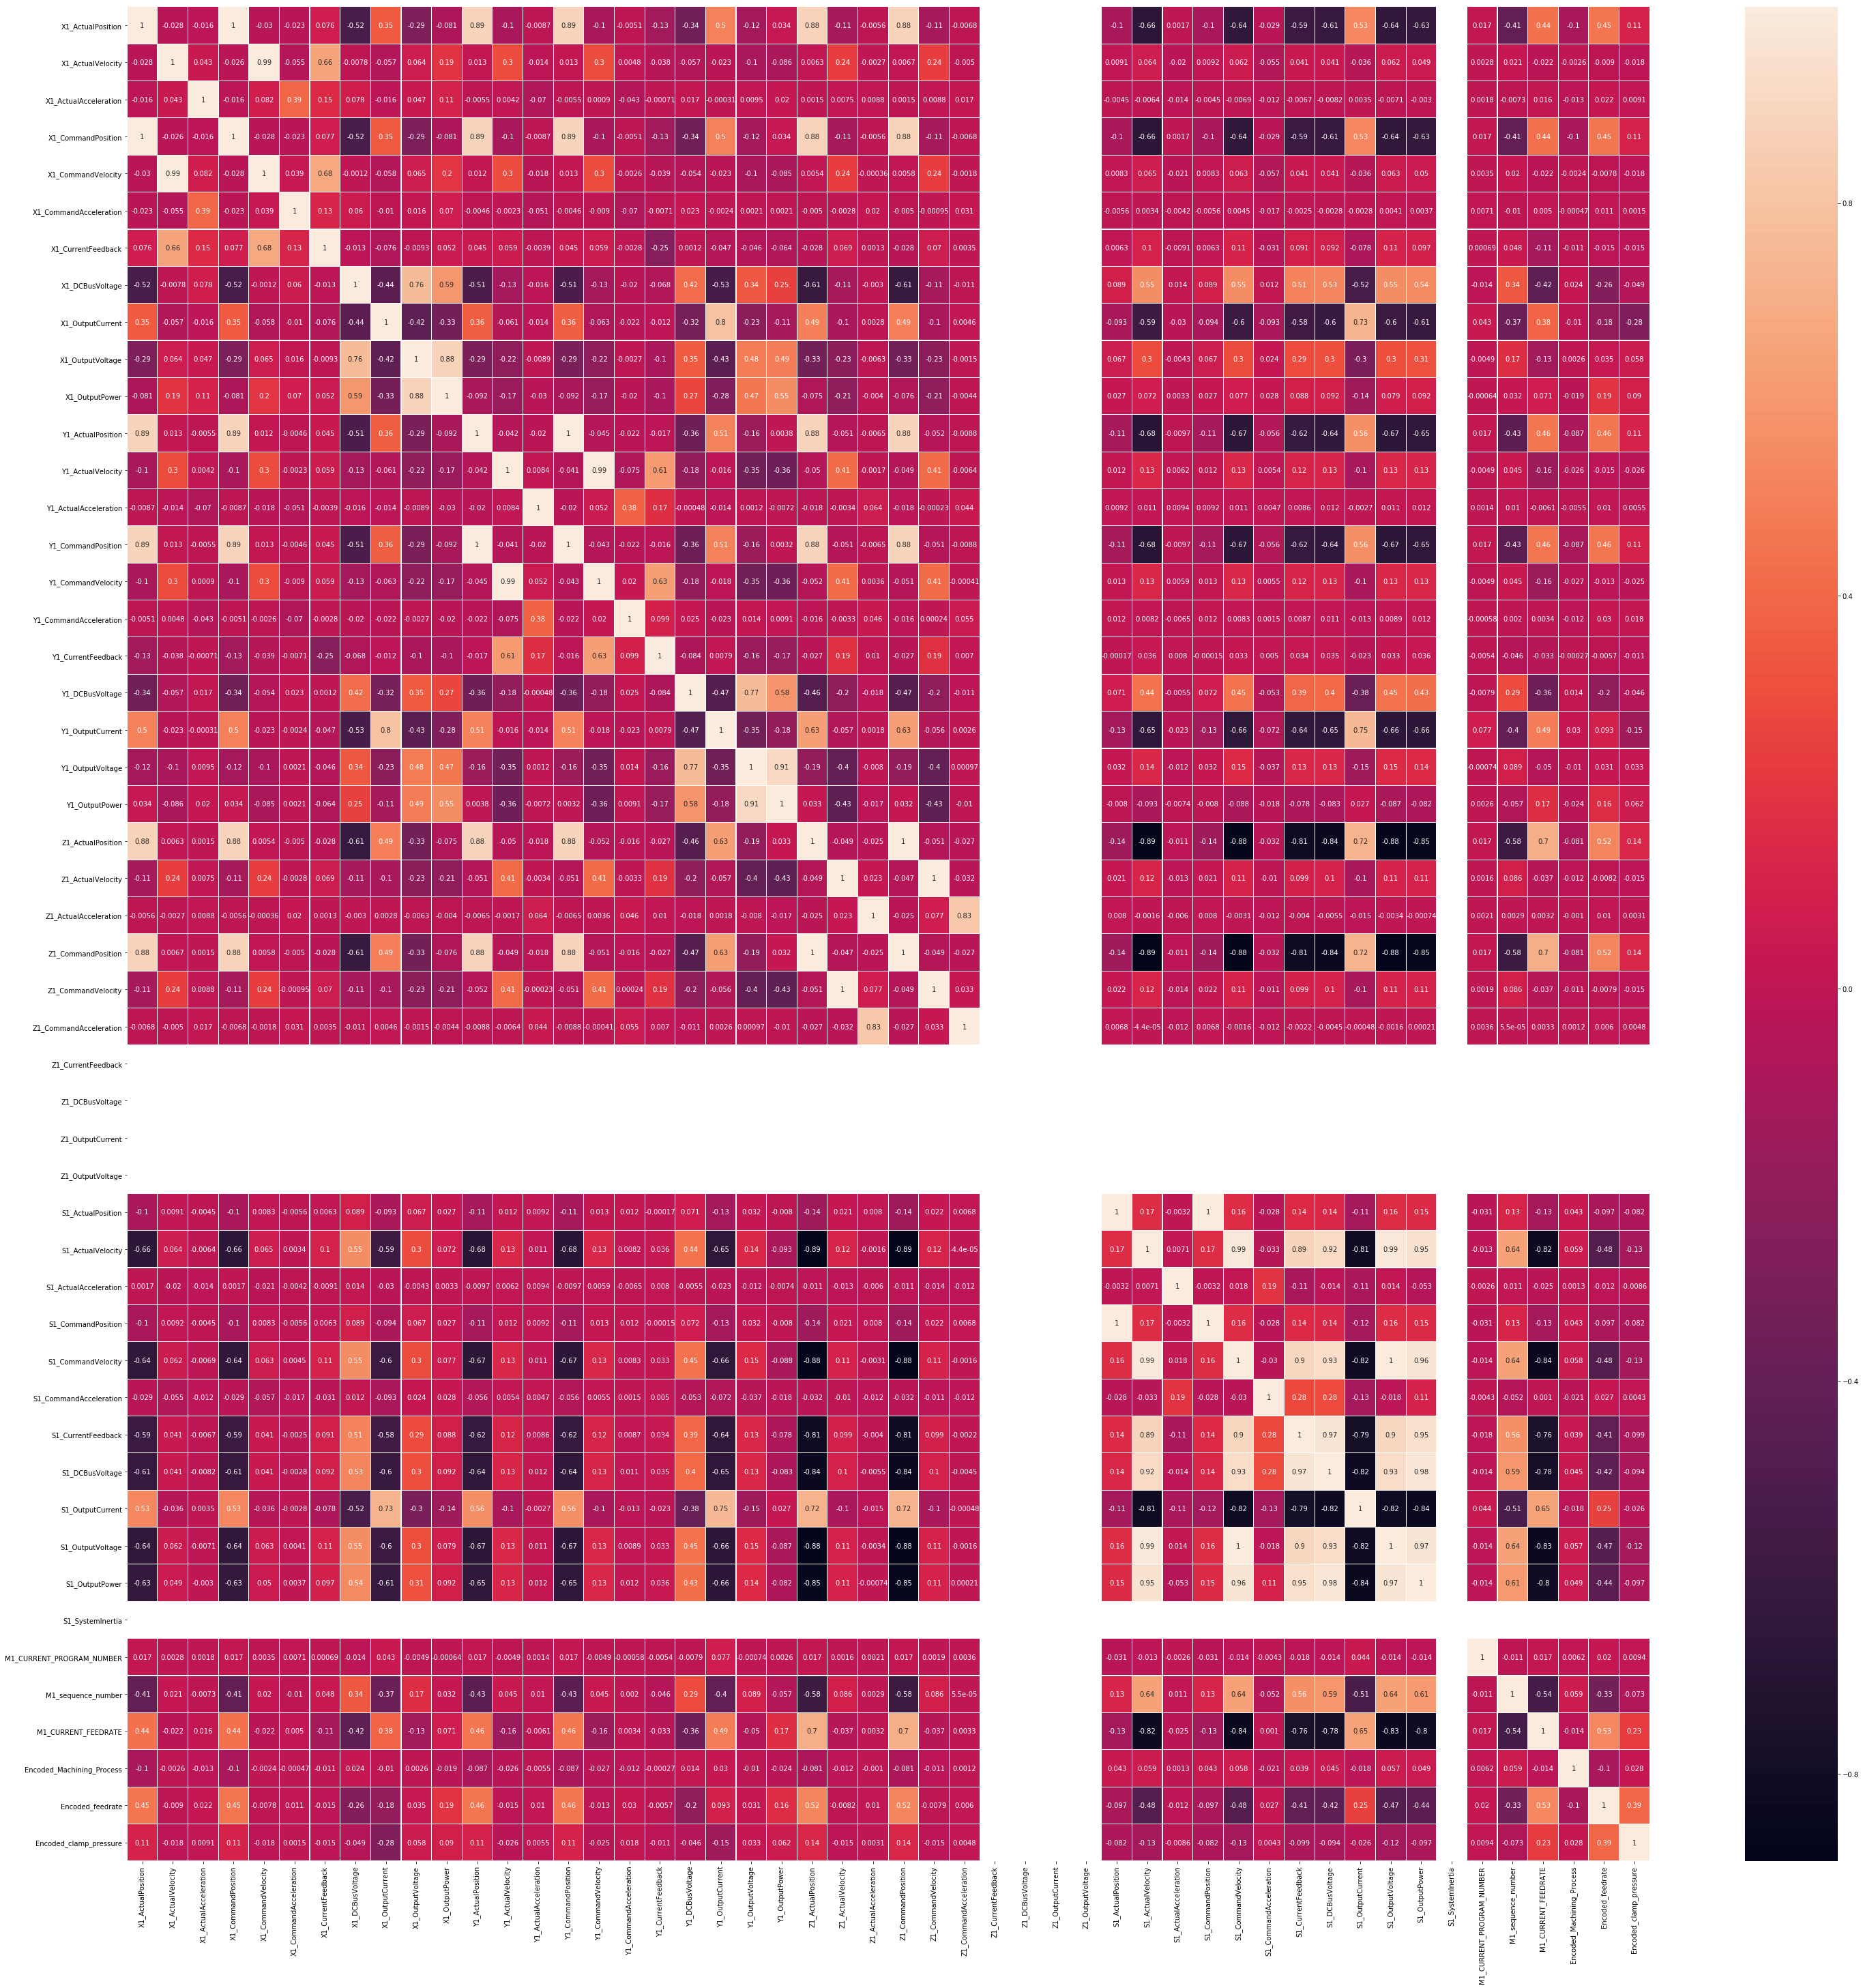

In [14]:
print(">>>>> Heatmap of frames <<<<<")
plt.figure(figsize=(50,50))
sns.heatmap(df.corr(),linewidths=.1,annot=True)
plt.show()
plt.savefig('fig.png')
plt.close('all')

In [15]:
df.drop(['Z1_CurrentFeedback','Z1_DCBusVoltage','Z1_OutputCurrent','Z1_OutputVoltage','S1_SystemInertia'],axis=1,inplace=True)

>>>>> Heatmap of frames after drop column <<<<<


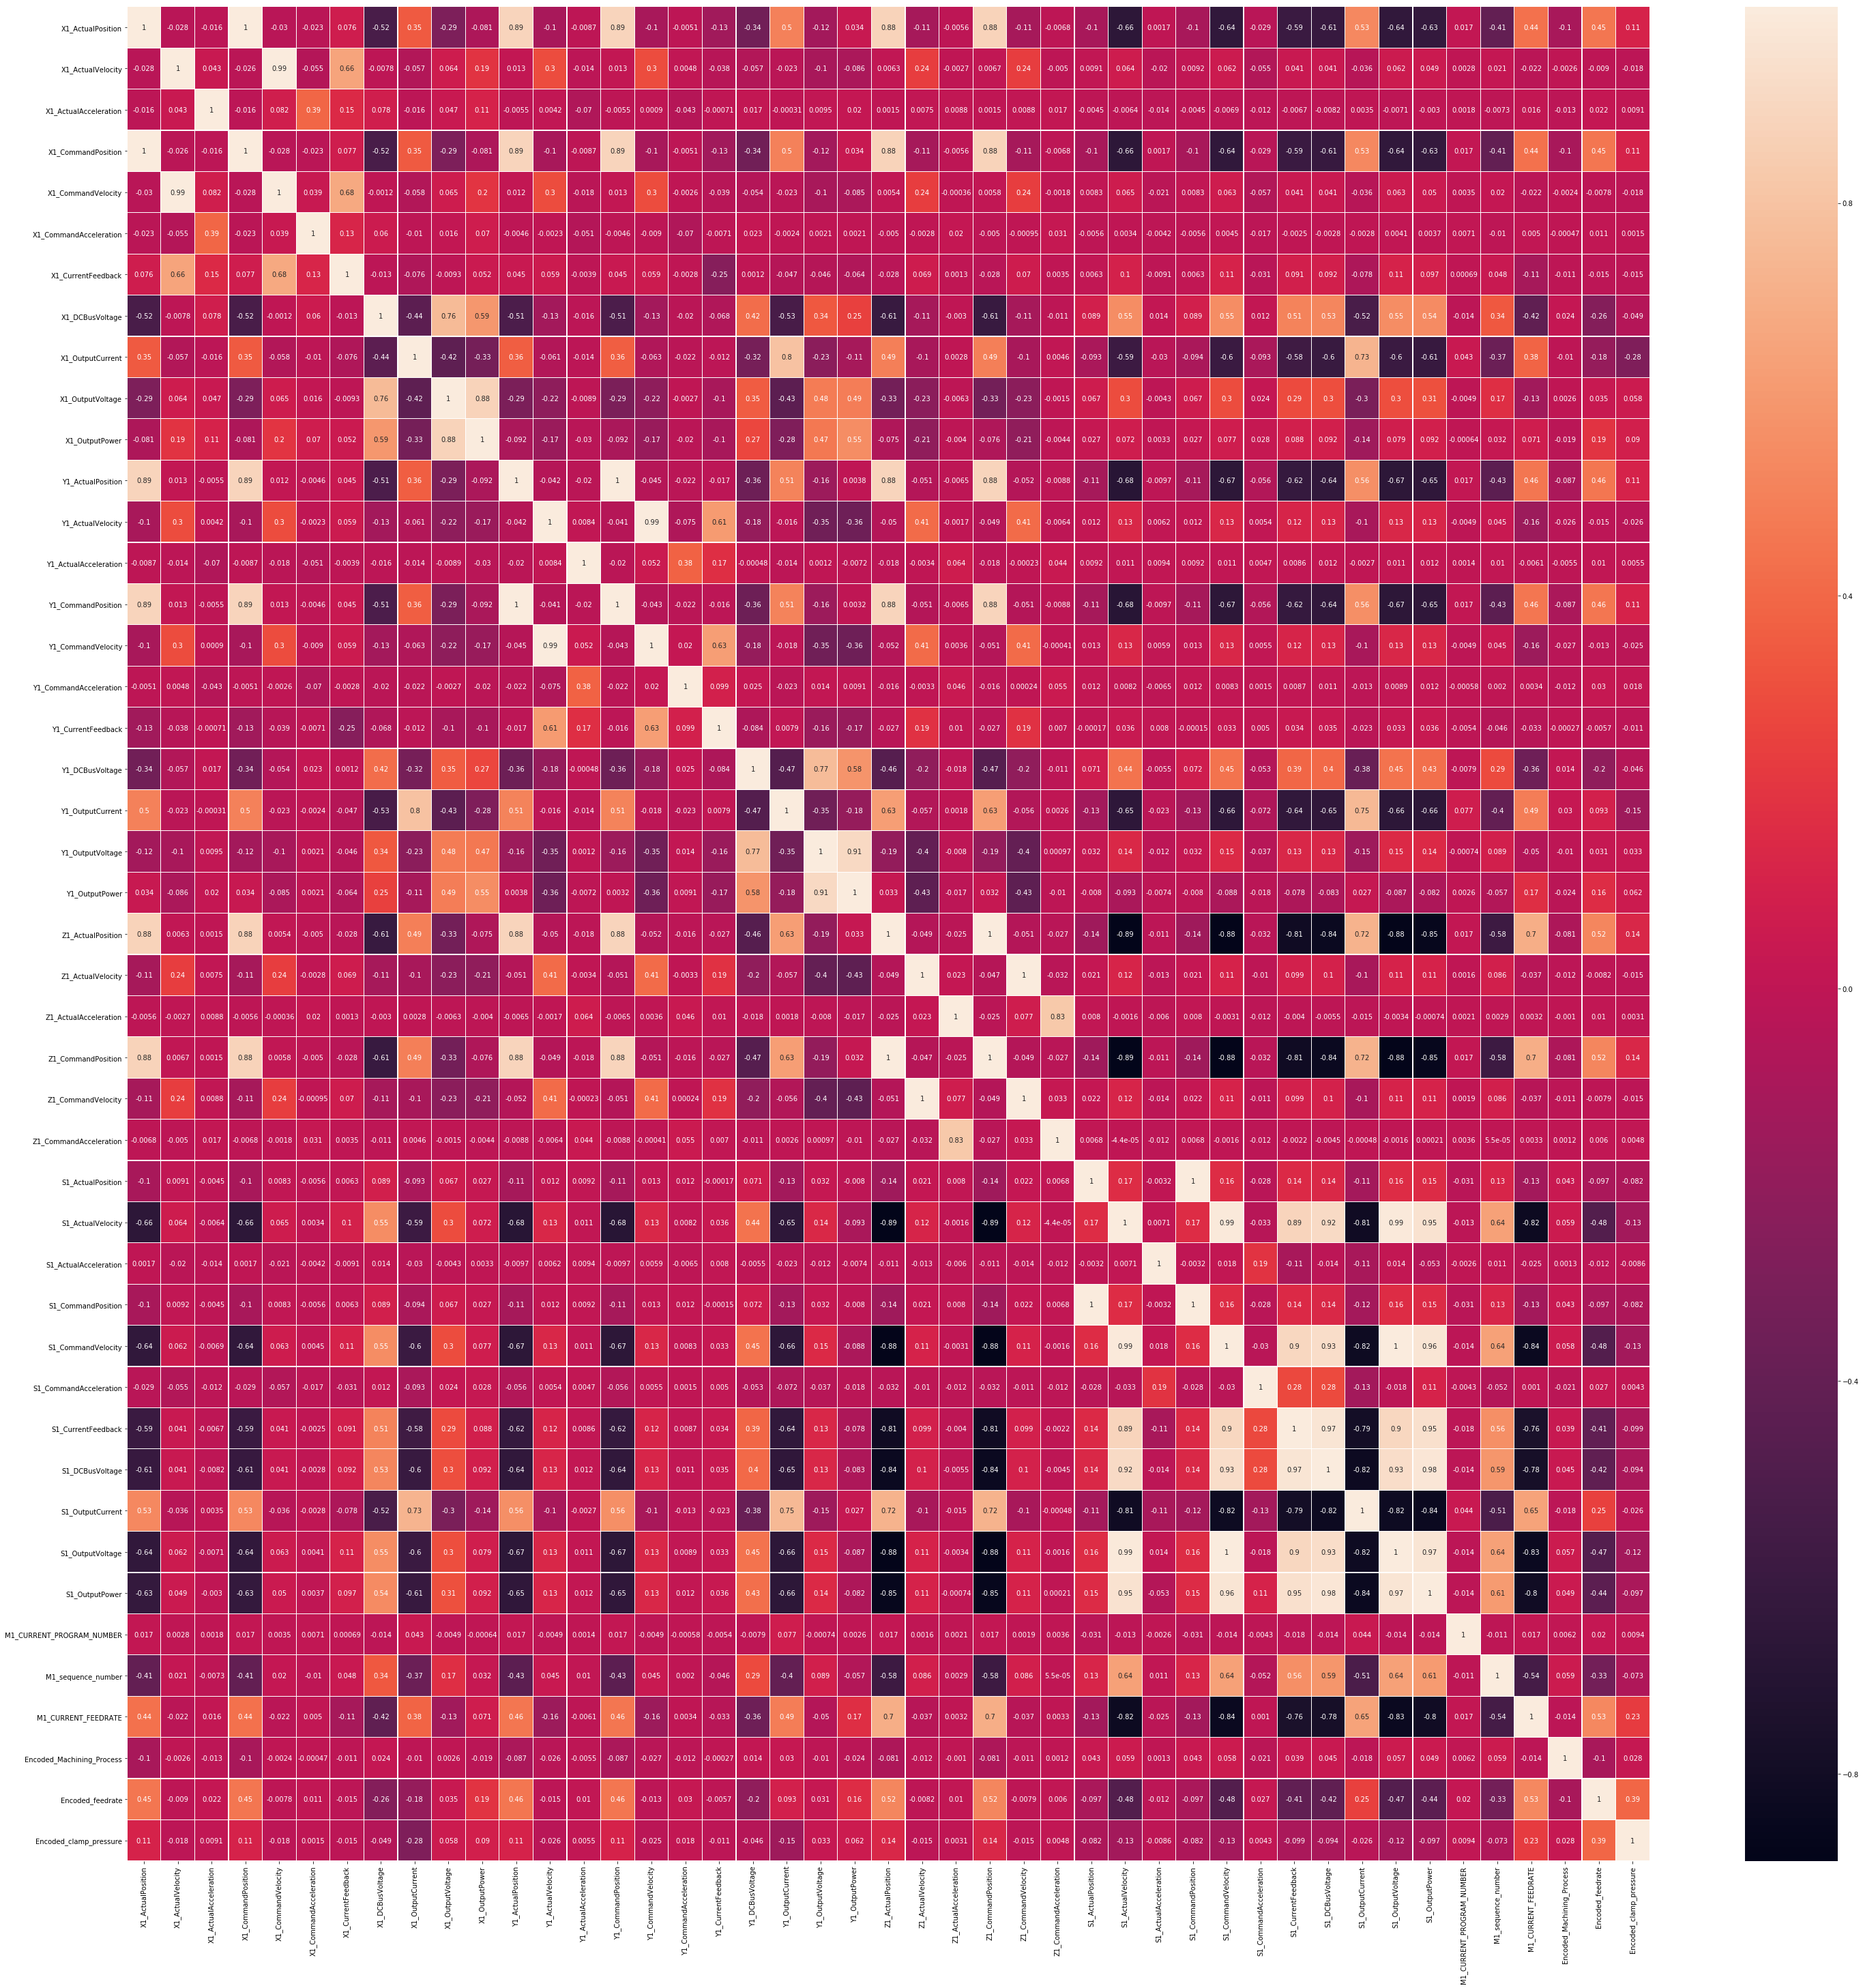

In [16]:
print(">>>>> Heatmap of frames after drop column <<<<<")
plt.figure(figsize=(50,50))
sns.heatmap(df.corr(),linewidths=.1,annot=True)
plt.show()

In [17]:
corr = df.corr()
print("\n>>>>> All features Correlation shape <<<<<")
print(df.corr().shape)


>>>>> All features Correlation shape <<<<<
(45, 45)


In [18]:
print("\n>>>>> Encoded_feedrate abs Correlation > 0.3 <<<<<")
cor_feedrate = abs(corr["Encoded_feedrate"])
relevant_features = cor_feedrate[cor_feedrate>0.3]
print(relevant_features)


>>>>> Encoded_feedrate abs Correlation > 0.3 <<<<<
X1_ActualPosition         0.454350
X1_CommandPosition        0.454284
Y1_ActualPosition         0.456606
Y1_CommandPosition        0.456624
Z1_ActualPosition         0.524963
Z1_CommandPosition        0.524995
S1_ActualVelocity         0.475970
S1_CommandVelocity        0.475906
S1_CurrentFeedback        0.411579
S1_DCBusVoltage           0.420048
S1_OutputVoltage          0.473093
S1_OutputPower            0.437202
M1_sequence_number        0.331066
M1_CURRENT_FEEDRATE       0.527989
Encoded_feedrate          1.000000
Encoded_clamp_pressure    0.388734
Name: Encoded_feedrate, dtype: float64


In [19]:
newDf_feedrate = df[['X1_ActualPosition', 'X1_CommandPosition', 'Y1_ActualPosition', 'Y1_CommandPosition', 'Z1_ActualPosition', 'Z1_CommandPosition', 'S1_ActualVelocity', 'S1_CommandVelocity', 'S1_CurrentFeedback', 'S1_DCBusVoltage', 'S1_OutputVoltage', 'S1_OutputPower', 'M1_sequence_number', 'M1_CURRENT_FEEDRATE', 'Encoded_feedrate']]
print("\n---------- newDf feedrate info: ----------")
print(newDf_feedrate.info())
print("---------- newDf feedrate head: ----------")
print(newDf_feedrate.head(3))


---------- newDf feedrate info: ----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25286 entries, 0 to 25285
Data columns (total 15 columns):
X1_ActualPosition      25286 non-null float64
X1_CommandPosition     25286 non-null float64
Y1_ActualPosition      25286 non-null float64
Y1_CommandPosition     25286 non-null float64
Z1_ActualPosition      25286 non-null float64
Z1_CommandPosition     25286 non-null float64
S1_ActualVelocity      25286 non-null float64
S1_CommandVelocity     25286 non-null float64
S1_CurrentFeedback     25286 non-null float64
S1_DCBusVoltage        25286 non-null float64
S1_OutputVoltage       25286 non-null float64
S1_OutputPower         25286 non-null float64
M1_sequence_number     25286 non-null float64
M1_CURRENT_FEEDRATE    25286 non-null float64
Encoded_feedrate       25286 non-null float64
dtypes: float64(15)
memory usage: 2.9 MB
None
---------- newDf feedrate head: ----------
   X1_ActualPosition  X1_CommandPosition  Y1_ActualPosition  \
0    

In [20]:
print("\n>>>>> Encoded_clamp_pressure abs Correlation > 0.1 <<<<<")
cor_clamp_pressure = abs(corr["Encoded_clamp_pressure"])

#Selecting highly correlated features
relevant_features2 = cor_clamp_pressure[cor_clamp_pressure>0.1]
print(relevant_features2)


>>>>> Encoded_clamp_pressure abs Correlation > 0.1 <<<<<
X1_ActualPosition         0.113518
X1_CommandPosition        0.113517
X1_OutputCurrent          0.283519
Y1_ActualPosition         0.112849
Y1_CommandPosition        0.112847
Y1_OutputCurrent          0.145806
Z1_ActualPosition         0.135540
Z1_CommandPosition        0.135540
S1_ActualVelocity         0.128213
S1_CommandVelocity        0.126779
S1_OutputVoltage          0.121822
M1_CURRENT_FEEDRATE       0.226954
Encoded_feedrate          0.388734
Encoded_clamp_pressure    1.000000
Name: Encoded_clamp_pressure, dtype: float64


## Select features that highly correlated to 'Encoded_clamp_pressure' into 'newDf_pressure'

In [21]:
newDf_pressure = df[['X1_ActualPosition', 'X1_CommandPosition', 'X1_OutputCurrent', 'Y1_ActualPosition', 'Y1_CommandPosition', 'Y1_OutputCurrent', 'Z1_ActualPosition', 'Z1_CommandPosition', 'S1_ActualVelocity', 'S1_CommandVelocity', 'S1_OutputVoltage', 'M1_CURRENT_FEEDRATE', 'Encoded_clamp_pressure']]
print("\n---------- newDf pressure info: ----------")
print(newDf_pressure.info())
print("---------- newDf pressure head: ----------")
print(newDf_pressure.head(3))


---------- newDf pressure info: ----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25286 entries, 0 to 25285
Data columns (total 13 columns):
X1_ActualPosition         25286 non-null float64
X1_CommandPosition        25286 non-null float64
X1_OutputCurrent          25286 non-null float64
Y1_ActualPosition         25286 non-null float64
Y1_CommandPosition        25286 non-null float64
Y1_OutputCurrent          25286 non-null float64
Z1_ActualPosition         25286 non-null float64
Z1_CommandPosition        25286 non-null float64
S1_ActualVelocity         25286 non-null float64
S1_CommandVelocity        25286 non-null float64
S1_OutputVoltage          25286 non-null float64
M1_CURRENT_FEEDRATE       25286 non-null float64
Encoded_clamp_pressure    25286 non-null float64
dtypes: float64(13)
memory usage: 2.5 MB
None
---------- newDf pressure head: ----------
   X1_ActualPosition  X1_CommandPosition  X1_OutputCurrent  Y1_ActualPosition  \
0              198.0               198.0

## Prediction: Split arrays into random train 70% and test 30% subsets

In [23]:
y=newDf_feedrate['Encoded_feedrate']
X=newDf_feedrate.drop(['Encoded_feedrate'], axis=1)
print("\n========== y.newDf_feedrate(3) ==========")
print(y.head(3))
print("\n========== X.newDf_feedrate(3) ==========")
print(X.head(3))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)


========== y.newDf_feedrate(3) ==========
0    1.0
1    1.0
2    1.0
Name: Encoded_feedrate, dtype: float64

========== X.newDf_feedrate(3) ==========
   X1_ActualPosition  X1_CommandPosition  Y1_ActualPosition  \
0              198.0               198.0              158.0   
1              198.0               198.0              158.0   
2              196.0               196.0              154.0   

   Y1_CommandPosition  Z1_ActualPosition  Z1_CommandPosition  \
0               158.0              119.0               119.0   
1               157.0              119.0               118.0   
2               154.0              115.0               115.0   

   S1_ActualVelocity  S1_CommandVelocity  S1_CurrentFeedback  S1_DCBusVoltage  \
0              0.001                 0.0               0.524     2.740000e-19   
1              0.000                 0.0              -0.288     2.740000e-19   
2              0.000                 0.0               0.524     2.740000e-19   

   S1_OutputV

In [24]:
LR_feedrate = LogisticRegression(C=1e20)
LR_feedrate.fit(X_train, y_train)
print("\n========== Logistic Regression score of feedrate ==========")
print(LR_feedrate.score(X_test,y_test))


========== Logistic Regression score of feedrate ==========
0.5975481149485895


In [25]:
## 2. Support vector machine model

In [26]:
SVM_feedrate = svm.SVC()
SVM_feedrate.fit(X_train, y_train)
print("\n========== Support vector machine score of feedrate  ==========")
print(SVM_feedrate.score(X_test, y_test))


========== Support vector machine score of feedrate  ==========
0.8200632744529396


In [28]:
## 3. Neural Networks

In [29]:
mlp_feedrate = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
mlp_feedrate.fit(X_train, y_train)
print("\n========== MLPClassifier score of feedrate  ==========")
print(mlp_feedrate.score(X_test, y_test))


========== MLPClassifier score of feedrate  ==========
0.5503559187977854


In [30]:
## 4. Nearest neighbors model

In [31]:
nrc_feedrate= NearestCentroid()
nrc_feedrate.fit(X_train, y_train)
print("\n========== NearestCentroid score of feedrate  ==========")
print(nrc_feedrate.score(X_test, y_test))


========== NearestCentroid score of feedrate  ==========
0.5896388083311364


In [32]:
## 5. Stochastic gradient descent model

In [33]:
SGD_feedrate= SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
SGD_feedrate.fit(X_train, y_train)
print("\n========== SGDClassifier score of feedrate  ==========")
print(SGD_feedrate.score(X_test, y_test))


========== SGDClassifier score of feedrate  ==========
0.5902979172159241


In [34]:
## 6. Decision trees model

In [35]:
tree_feedrate = tree.DecisionTreeClassifier()
tree_feedrate.fit(X_train, y_train)
print("\n========== DecisionTreeClassifier score of feedrate  ==========")
print(tree_feedrate.score(X_test, y_test))


========== DecisionTreeClassifier score of feedrate  ==========
0.9488531505404693


In [37]:
# Use 'Decision trees model' to predict feedrate data


predictions_feedrate = tree_feedrate.predict(X_test)
print("\n========== Prediction_feedrate results  ==========")
print(predictions_feedrate)


========== Prediction_feedrate results  ==========
[0. 0. 4. ... 0. 1. 0.]
